# Desafio I2A2 - Titanic
Para este desafio será utilizado a metodologia CRISP-DS e os dados fornecidos no SLACK
A solução será realizada levando em consideração os tópicos:
* Entender o Problema
* Explorar e Analisar os Dados
* Modelar os Dados
* Criar o Modelo
* Deployment do modelo

# Entender o Problema
Analisado a história do navio Titanic, com base em artigo da [Wikipedia](https://pt.wikipedia.org/wiki/RMS_Titanic)

Os dados usados foram divididos em dois grupos:

Dados de treinamento: Train.xlsx, usado para criar o modelo de aprendizado de máquina.

Dados de teste: Test.xlsx, usado para avaliar o desempenho do modelo.


**Objetivo:** Avaliar a variável se o passageiro sobreviveu ou não. 

# Explorar e Analisar os dados
Baixar os arquivos de dados fornecidos para o desafio e analisar

In [33]:
# Baixar os dados e descompactar
!wget https://futurizar.com.br/dados/dados.zip
!unzip /content/dados

--2022-01-09 23:36:25--  https://futurizar.com.br/dados/dados.zip
Resolving futurizar.com.br (futurizar.com.br)... 108.167.132.147
Connecting to futurizar.com.br (futurizar.com.br)|108.167.132.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150412 (147K) [application/zip]
Saving to: ‘dados.zip’

dados.zip           100%[===================>] 146.89K   944KB/s    in 0.2s    

2022-01-09 23:36:26 (944 KB/s) - ‘dados.zip’ saved [150412/150412]

Archive:  /content/dados.zip
  inflating: Test.xlsx               
  inflating: Train.xlsx              


In [34]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# importando os datasets com o Pandas
df_train = pd.read_excel("Train.xlsx")
df_test = pd.read_excel("Test.xlsx")

# Analisando os dados de treinamento

In [36]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  891 non-null    int64  
 1   pclass          891 non-null    int64  
 2   survived        891 non-null    int64  
 3   name            891 non-null    object 
 4   sex             891 non-null    object 
 5   age             714 non-null    float64
 6   sibsp           891 non-null    int64  
 7   parch           891 non-null    int64  
 8   ticket          891 non-null    object 
 9   fare            891 non-null    float64
 10  cabin           204 non-null    object 
 11  embarked        889 non-null    object 
 12  boat            330 non-null    object 
 13  body            83 non-null     float64
 14  home.dest       499 non-null    object 
 15  orig_seq        891 non-null    int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaggle_Pass_Id  418 non-null    int64  
 1   pclass          418 non-null    int64  
 2   name            418 non-null    object 
 3   sex             418 non-null    object 
 4   age             332 non-null    float64
 5   sibsp           418 non-null    int64  
 6   parch           418 non-null    int64  
 7   ticket          418 non-null    object 
 8   fare            417 non-null    float64
 9   cabin           91 non-null     object 
 10  embarked        418 non-null    object 
 11  boat            156 non-null    object 
 12  body            38 non-null     float64
 13  home.dest       246 non-null    object 
 14  orig_seq        418 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 49.1+ KB


In [38]:
df_train.head()


,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619


In [39]:
df_test.head()

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN,925
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,1291
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN,"Cambridge, MA",512
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,131.0,NaN,1297
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,15,NaN,NaN,868


In [40]:
df_train.describe()

,Kaggle_Pass_Id,pclass,survived,age,sibsp,parch,fare,body,orig_seq
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,83.000000,891.000000
mean,446.000000,2.308642,0.383838,29.699113,0.523008,0.381594,32.204208,162.843373,662.304153
std,257.353842,0.836071,0.486592,14.526507,1.102743,0.806057,49.693429,96.945356,378.282967
min,1.000000,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,4.000000,1.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,73.500000,335.500000
50%,446.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,169.000000,666.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,252.000000,993.500000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,328.000000,1309.000000


**Resumo:** 
Analisando os dados e as saídas acima temos 891 linhas com 16 colunas.
Estão falatando alguns dados, como nas colunas age, cabin, embarked, boat, body e home.dest. 

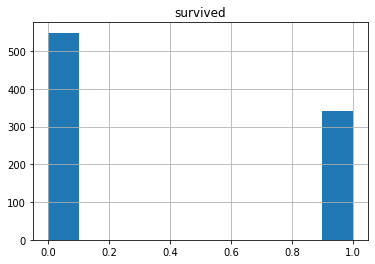

In [41]:
# Número de passageiros sobreviventes
df_train.hist(column="survived");

No gráfico acima fica representado por 1.0 são os sobreviventes que correspondem a 38%, também identificados na mean do comando describe()

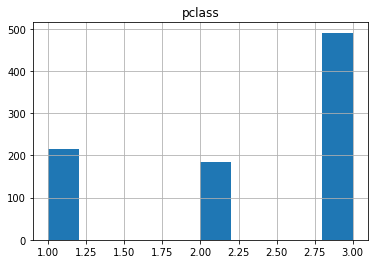

In [42]:
# Número de passageiros por classe
df_train.hist(column="pclass");

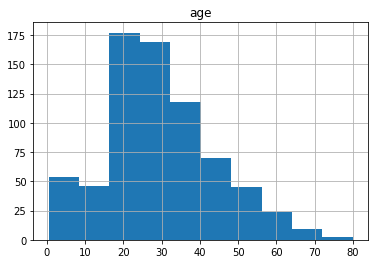

In [43]:
# Número de passageiros por idade
df_train.hist(column="age");

**Resumo:** Analisando o gráfico acima, podemos perceber que a faixa da idade com maior número de passageiros ficou entre 20 a 38 anos

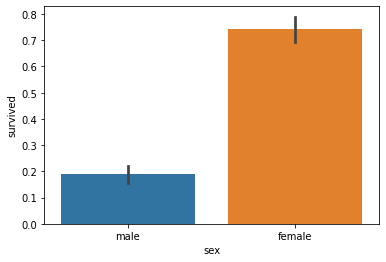

In [44]:
sns.barplot(x='sex', y='survived', data=df_train);

**Resumo:** Analisando o gráfico acima, podemos perceber que as chances das mulheres sobreviverem foi maior do que a dos homens.

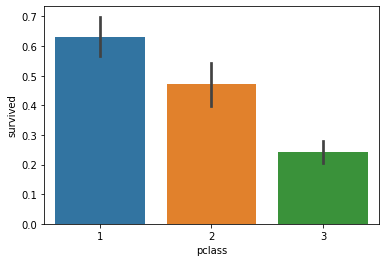

In [45]:
sns.barplot(x='pclass', y='survived', data=df_train);

**Resumo:** Analisando o gráfico acima, podemos perceber que as chances de sobreviver foram maiores na primeira classe.

In [46]:
df_analise_train = pd.DataFrame({'Colunas': df_train.columns,
                       'Tipos': df_train.dtypes,
                       'Percentual_faltantes': df_train.isna().sum() / df_train.shape[0]})
df_analise_train

,Colunas,Tipos,Percentual_faltantes
Kaggle_Pass_Id,Kaggle_Pass_Id,int64,0.000000
pclass,pclass,int64,0.000000
survived,survived,int64,0.000000
name,name,object,0.000000
sex,sex,object,0.000000
age,age,float64,0.198653
sibsp,sibsp,int64,0.000000
parch,parch,int64,0.000000
ticket,ticket,object,0.000000
fare,fare,float64,0.000000


**Resumo**: Conforme descrito acima s colunas que contem dados faltantes em percentual são: age, cabin, boat, body e home.dest.





# Modelar os Dados
Nesta etapa as variáveis que serão usadas no modelo são selecionadas, visto que alguns dados não ajudam a modelar quem sobreviveu. 

In [47]:
# Armazenar os ids dos passageiros para uso futuro
passengerId = df_test['Kaggle_Pass_Id']
# Retirada do datase das colunas que não fazem parte das variaveis importantes a primeira vista
df_train.drop(['Kaggle_Pass_Id', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'orig_seq'], axis=1, inplace=True)
df_test.drop(['Kaggle_Pass_Id', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'orig_seq'], axis=1, inplace=True)


In [48]:
# Identificando os Missing Values
df_train.isna().sum()

pclass        0
survived      0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [49]:
df_test.isna().sum()

pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [50]:
#Para tratar dos dados faltantes da coluna age, vou substituir os nulos pela mediana 
df_train['age'].fillna(df_train['age'].median(), inplace=True)
df_train.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [51]:
df_test['age'].fillna(df_test['age'].median(), inplace=True)
df_test.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

In [53]:
# Contar  o maior  número de embarked
df_train['embarked'].value_counts().to_dict()

{'C': 168, 'Q': 77, 'S': 644}

In [54]:
# Para tratar dos dados faltantes da coluna embarked, 
# vou substituir os nulos pela Letra S que representa o maior número de passageiros embacardo neste porto 
df_train['embarked'].fillna('S', inplace=True)
df_train.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [55]:
df_test['fare'].fillna(df_test['fare'].median(), inplace=True)
df_test.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [56]:
# Guardando a variável 'suvived'
target = df_train['survived']

# Tirando a variável do Datafram Train
df_train.drop(['survived'], axis=1, inplace=True)

In [58]:
# Os Datasets possuem as mesmas features?
df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True])

Modelando as Variáveis

In [59]:
# Importando o LabelEncoder para transofrmar a coluna sex e embarked em números 
from sklearn.preprocessing import LabelEncoder

In [60]:
df_train['sex'] = df_train[['sex']].apply(LabelEncoder().fit_transform)
df_train['embarked'] = df_train[['embarked']].apply(LabelEncoder().fit_transform)
df_test['sex'] = df_test[['sex']].apply(LabelEncoder().fit_transform)
df_test['embarked'] = df_test[['embarked']].apply(LabelEncoder().fit_transform)

In [61]:
df_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [62]:
df_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [63]:
# Importando a biblioteca do Modelo de Machine Learning
from sklearn.linear_model import LogisticRegression

In [64]:
# Criando o Modelo de Regressão Linear
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(df_train, target)

LogisticRegression(solver='liblinear')

In [65]:
# Verificar a acurácia do Modelo
ac_lr = round(lr_model.score(df_train, target) * 100, 2)
print("Acurácia do Modelo de Regressão Logística: {}". format(ac_lr))

Acurácia do Modelo de Regressão Logística: 80.36


In [66]:
# Criando o modelo de predição e gerando o arquivo para submissão para o Kaggle
y_pred_lr = lr_model.predict(df_test)
submission = pd.DataFrame({"PassengerId": passengerId,
                           "Survived": y_pred_lr})

# Gerando o arquivo
submission.to_csv('submission_lr.csv', index=False)


Submetido o arquivo csv para o Kaggle, pontuação 0,76076

# Deployment do modelo

Para criar uma solução, pode ser criado uma API onde é inserido os dados do passageiro e o retorno seria se ele sobreviveu ou não.